# A/B Testing Online Advertising

A major company with a large user base is exploring the potential of increasing sales by displaying ads on its website. However, they are uncertain whether these ads truly drive sales growth. To investigate this, they conducted A/B testing over a 30-day period with 20,000 customers. In this experiment, the group exposed to the ads is the treatment group (labeled "ad"), while the control group, which did not see the ads, is labeled "psa".


**Variables**:

* **customerID**: Unique identifier for the customer.
* **test group**: A categorical variable in an A/B testing setup. 'ad' indicates customers exposed to ads (treatment group), and 'psa' represents those not exposed (control group).
* **made_purchase**: A Boolean value representing whether or not the user made a purchase after seeing an advertisement.
* **days_with_most_add**: A day of the month when the user saw the most ads.
* **peak ad hours**: An hour of the day when the user saw the most ads.
* **ad_count**: Total number of ads seen by each user.

You can access the dataset here: [Online Advertising Effectiveness](https://www.kaggle.com/datasets/farhadzeynalli/online-advertising-effectiveness-study-ab-testing/data)

## Libraries

In [130]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats

## Loading data

In [131]:
df = pd.read_csv('/Users/gulsumasenacakir/Downloads/online_ad_AB.csv')

In [132]:
df.head(10)

,customerID,test group,made_purchase,days_with_most_add,peak ad hours,ad_count
0,1,ad,False,24,20,5
1,2,psa,False,21,16,9
2,3,psa,False,1,18,8
3,4,ad,False,20,23,7
4,5,ad,False,3,13,5
5,6,ad,False,13,22,7
6,7,ad,False,7,19,6
7,8,psa,False,6,22,10
8,9,psa,False,6,15,7
9,10,psa,False,2,19,5


## Data cleaning

### 1) Null Values

In [133]:
df.isnull().sum()

customerID            0
test group            0
made_purchase         0
days_with_most_add    0
peak ad hours         0
ad_count              0
dtype: int64

### 2) Duplicate

In [134]:
number_duplicate = df.duplicated().sum()
print('The number of duplicate is', number_duplicate)

The number of duplicate is 0


### 3) Whitespace

In [135]:
whitespace_check = df.map(lambda x: isinstance(x, str) and x.isspace())
whitespace_counts = whitespace_check.sum()
print(whitespace_counts)

customerID            0
test group            0
made_purchase         0
days_with_most_add    0
peak ad hours         0
ad_count              0
dtype: int64


### 4) Change inappropriate column names

In [136]:
df = df.rename(columns={'test group': 'group', 'peak ad hours': 'peak_ad_hours'})

In [137]:
df.columns

Index(['customerID', 'group', 'made_purchase', 'days_with_most_add',
       'peak_ad_hours', 'ad_count'],
      dtype='object')

## Analysis

### 1) Number of observations and number of purchases based on control and experimental groups

In [138]:
df.groupby('group').agg({'customerID': 'count', 'made_purchase': 'sum'}).rename(columns={'customerID': 'number_of_observations', 'made_purchase': 'number_of_purchases'})

,number_of_observations,number_of_purchases
group,,
ad,12053,803
psa,7947,257


### 2) 30-Day Customer Count or User Activity Analysis

In [139]:
days = np.sort(pd.unique(df['days_with_most_add']))
days

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [140]:
data_days = df.groupby('days_with_most_add')['customerID'].count()
con_days = df[df['group'] == 'psa'].groupby('days_with_most_add')['customerID'].count()
exp_days = df[df['group'] == 'ad'].groupby('days_with_most_add')['customerID'].count()

Create a function to generate a two-row bar chart: the first row displays the overall data distribution, while the second row compares the control and experiment groups using side-by-side bars.

In [141]:
def bar_fig(period, data1, data2, data3, subtit1, subtit2, x_label, y_label, figtitle):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

    axs[0].bar(period, data1.values, color='blue')
    axs[0].set_title(subtit1)
    axs[0].set_xlabel(x_label)
    axs[0].set_ylabel(y_label)

    bar_width = 0.35 
    axs[1].bar(period - bar_width/2, data2.values, width=bar_width, color='green', label='Control Group')
    axs[1].bar(period + bar_width/2, data3.values, width=bar_width, color='red', label='Experiment Group')
    axs[1].set_title(subtit2)
    axs[1].set_xlabel(x_label)
    axs[1].set_ylabel(y_label)
    axs[1].legend()

    axs[0].set_xticks(period)
    axs[1].set_xticks(period)

    fig.suptitle(figtitle, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

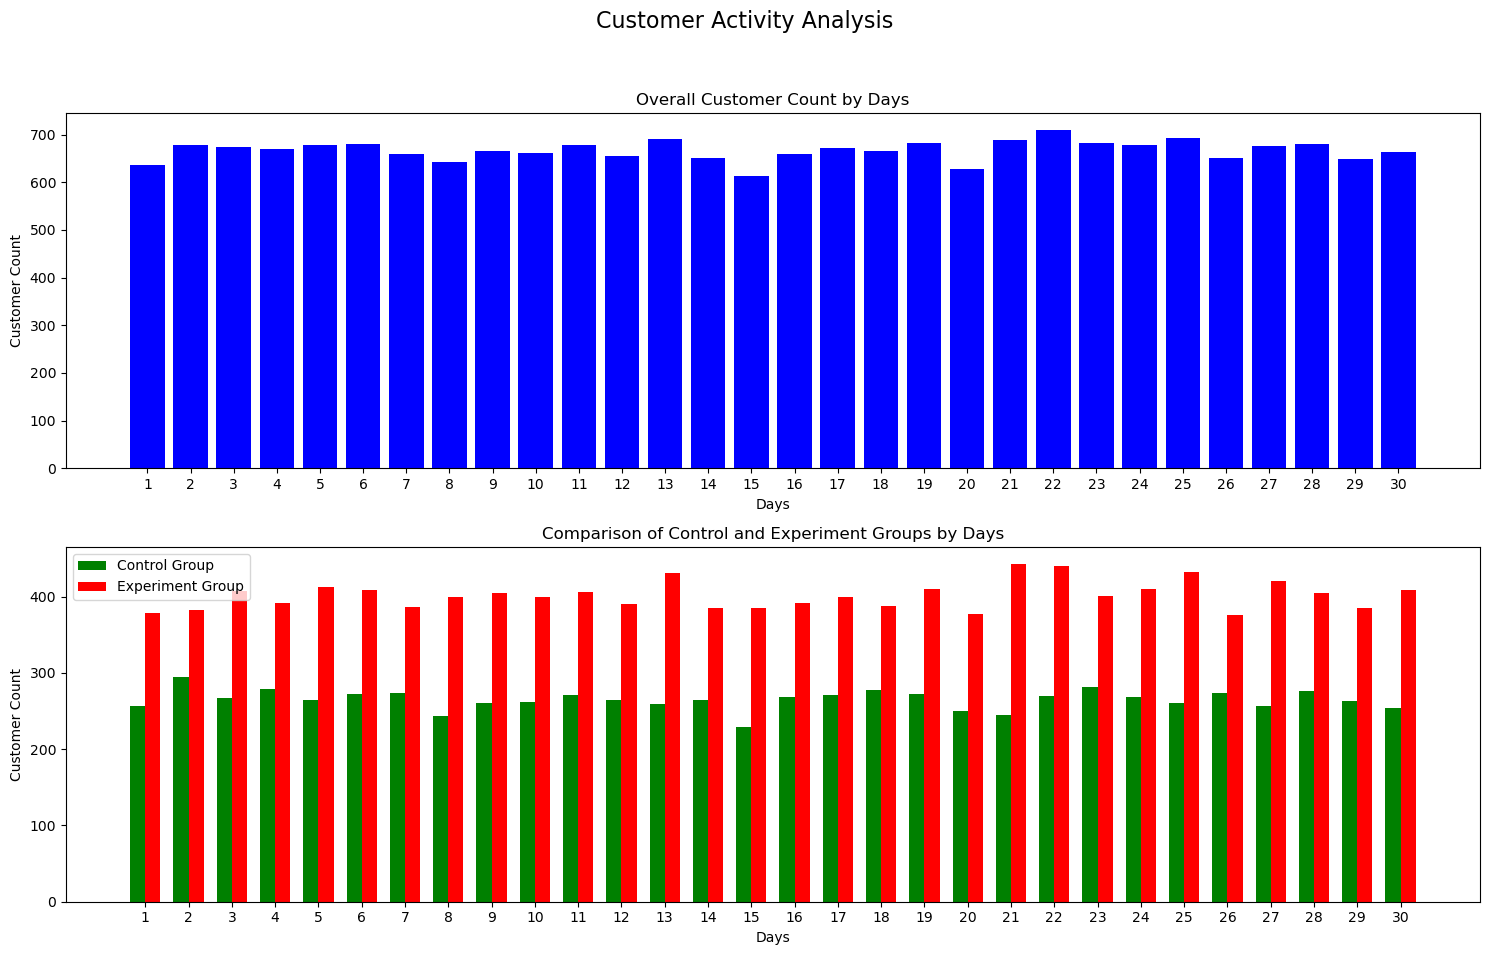

In [142]:
bar_fig(period=days, 
        data1=data_days, 
        data2=con_days, 
        data3=exp_days, 
        subtit1='Overall Customer Count by Days', 
        subtit2='Comparison of Control and Experiment Groups by Days', 
        x_label='Days', 
        y_label='Customer Count', 
        figtitle='Customer Activity Analysis')

From the comparative analysis, it is evident that the experiment/treatment group has a higher customer count than the control group, suggesting that the ads may be effectively enhancing customer engagement. 

### 3) Ad View Trends: Daily Totals and Group Comparison

In [143]:
days_ad_count = df.groupby('days_with_most_add')['ad_count'].sum()
exp_days_ad_count = df[df['group'] == 'ad'].groupby('days_with_most_add')['ad_count'].sum()
con_days_ad_count = df[df['group'] == 'psa'].groupby('days_with_most_add')['ad_count'].sum()

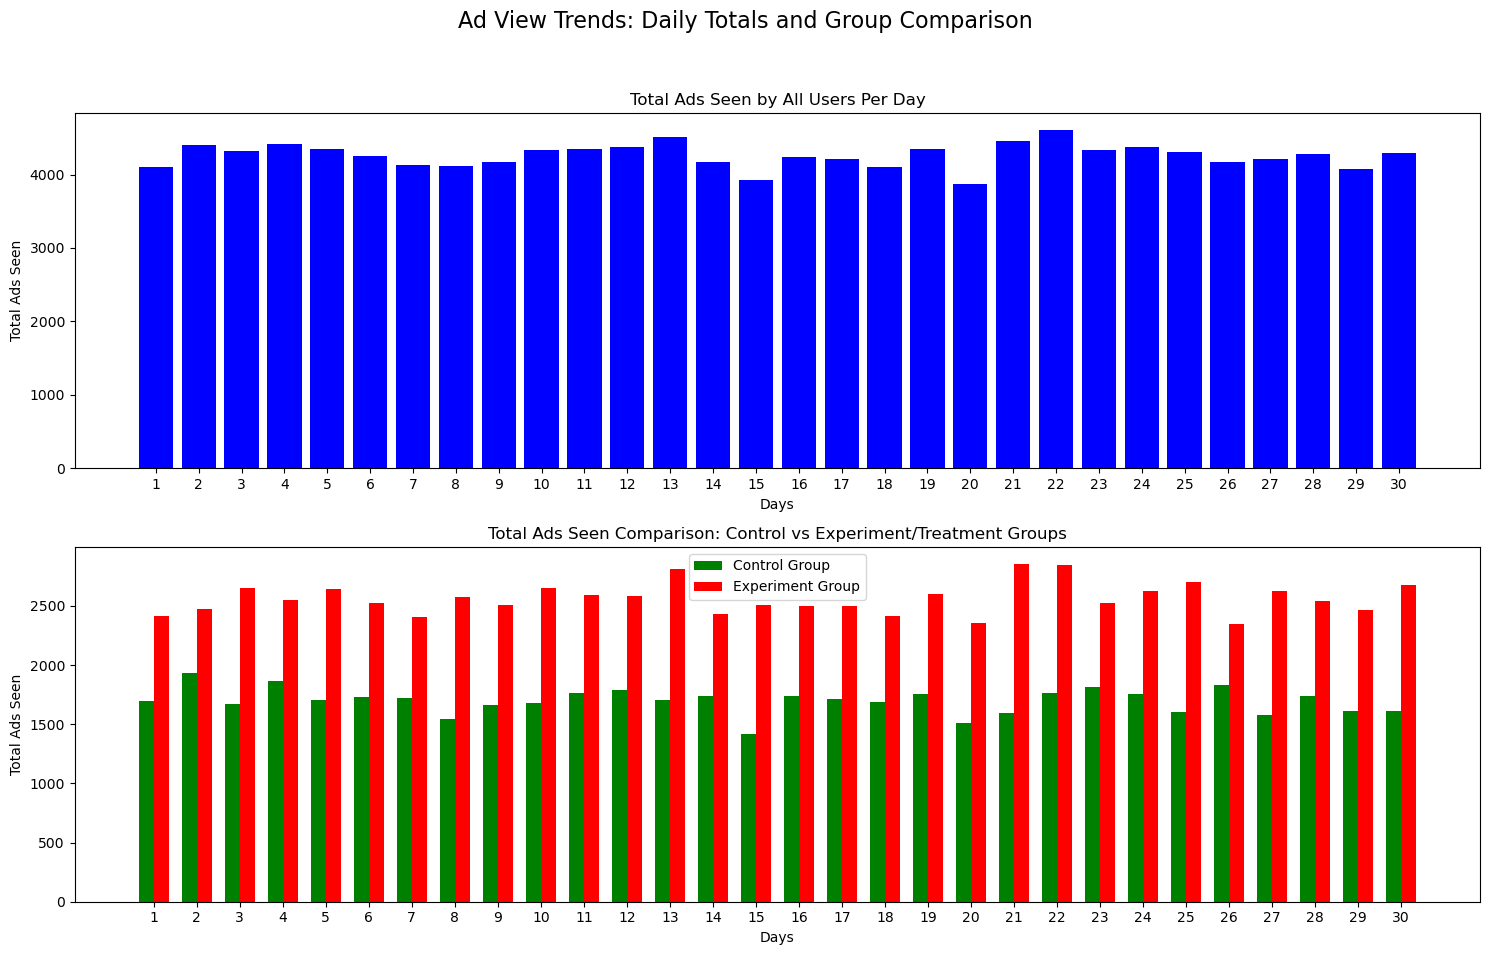

In [144]:
bar_fig(period=days, 
        data1=days_ad_count, 
        data2=con_days_ad_count, 
        data3=exp_days_ad_count, 
        subtit1='Total Ads Seen by All Users Per Day', 
        subtit2='Total Ads Seen Comparison: Control vs Experiment/Treatment Groups', 
        x_label='Days', 
        y_label='Total Ads Seen', 
        figtitle='Ad View Trends: Daily Totals and Group Comparison')

Similar to previous analysis, the treatment group sees more ads than the control group every day.

### 4) User Activity by Hours

In [145]:
time = np.sort(pd.unique(df['peak_ad_hours']))
time

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [146]:
data_time = df.groupby('peak_ad_hours')['customerID'].count()
time_exp = df[df['group'] == 'ad'].groupby('peak_ad_hours')['customerID'].count() # for the treatment/experimental group
time_con = df[df['group'] == 'psa'].groupby('peak_ad_hours')['customerID'].count() # for the control group

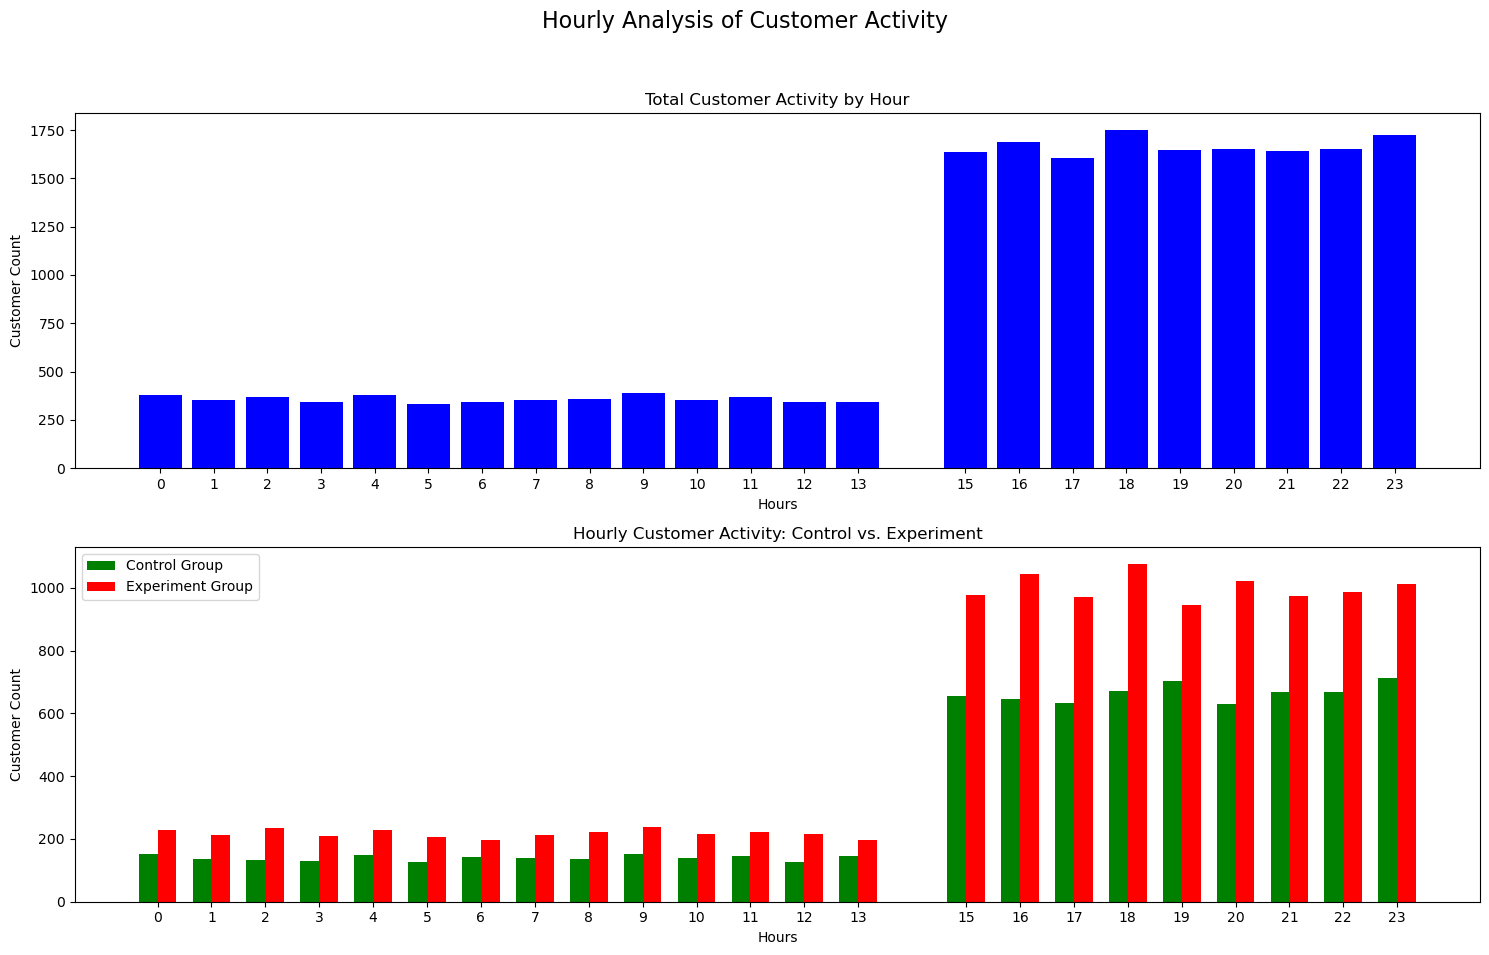

In [147]:
bar_fig(period=time, 
        data1=data_time, 
        data2=time_con, 
        data3=time_exp, 
        subtit1='Total Customer Activity by Hour', 
        subtit2='Hourly Customer Activity: Control vs. Experiment', 
        x_label='Hours', 
        y_label='Customer Count', 
        figtitle='Hourly Analysis of Customer Activity')

The data clearly shows that user activity intensifies from 15:00 to 23:00.

### 5) Analysis of Ads Seen by Users Throughout the Day

In [148]:
data_time_ad = df.groupby('peak_ad_hours')['ad_count'].sum()
time_exp_ad = df[df['group'] == 'ad'].groupby('peak_ad_hours')['ad_count'].sum() 
time_con_ad = df[df['group'] == 'psa'].groupby('peak_ad_hours')['ad_count'].sum()

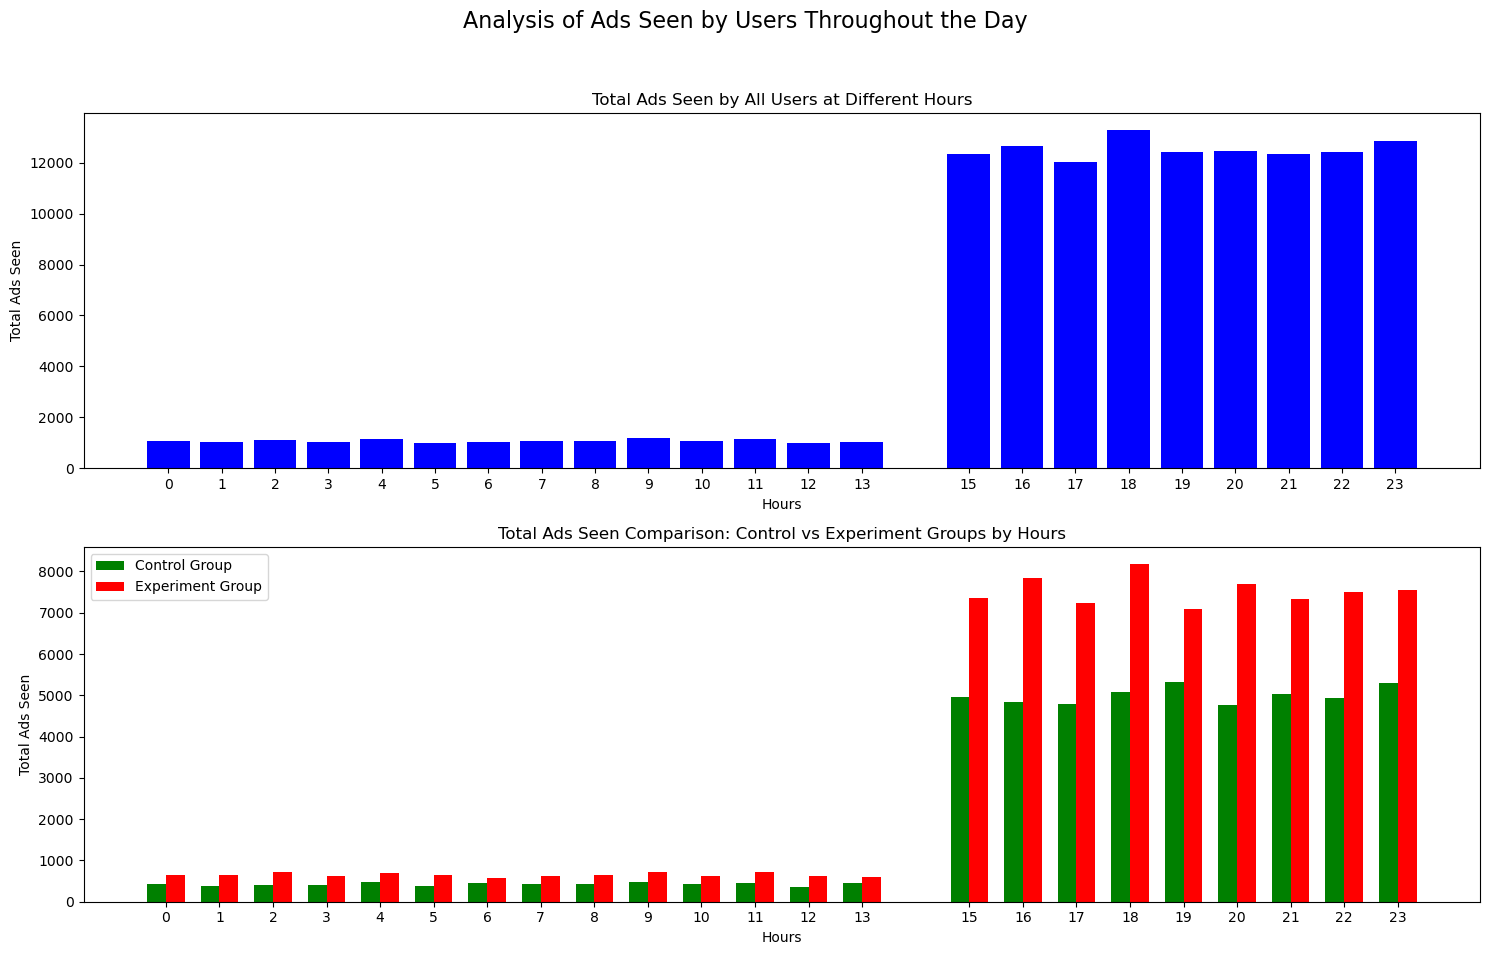

In [149]:
bar_fig(period=time, 
        data1=data_time_ad, 
        data2=time_con_ad, 
        data3=time_exp_ad, 
        subtit1='Total Ads Seen by All Users at Different Hours', 
        subtit2='Total Ads Seen Comparison: Control vs Experiment Groups by Hours', 
        x_label='Hours', 
        y_label='Total Ads Seen', 
        figtitle='Analysis of Ads Seen by Users Throughout the Day')


Similar to previous analyse, the total number of ads viewed generally increases for both groups between 15:00 and 23:00 compared to other hours. Additionally, the treatment group consistently sees more ads than the control group during these peak hours.

### 6) Conversion Rate by Groups

In [150]:
conversions = df.groupby('group').agg({'customerID':'count', 'made_purchase': ['sum', 'mean', 'std', lambda x: np.std(x, ddof=1)/np.sqrt(len(x))]})
conversions

customerID made_purchase                               
           count           sum      mean       std <lambda_0>
group                                                        
ad         12053           803  0.066622  0.249377   0.002271
psa         7947           257  0.032339  0.176911   0.001985

In [151]:
conversions.columns = ['number of observations', 'total_conversions', 'conversion_rate', 'std_dev', 'std_error']
conversions = conversions.rename(index={'ad': 'Treatment Group', 'psa': 'Control Group'})
conversions

,number of observations,total_conversions,conversion_rate,std_dev,std_error
group,,,,,
Treatment Group,12053,803,0.066622,0.249377,0.002271
Control Group,7947,257,0.032339,0.176911,0.001985


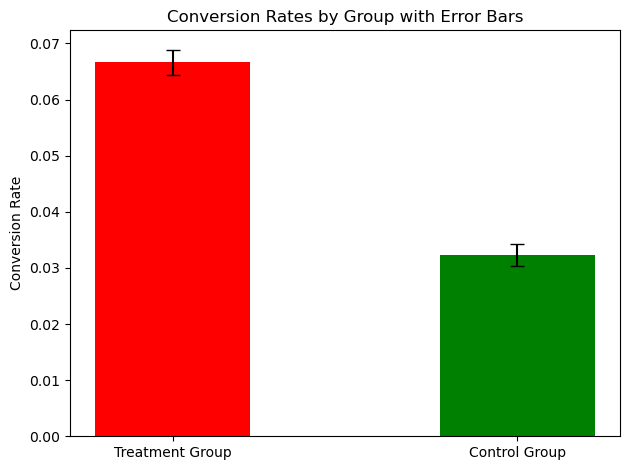

In [152]:
groups = conversions.index.tolist()
conversion_rates = conversions['conversion_rate'].values
errors = conversions['std_error'].values 

fig, ax = plt.subplots()
bar_width = 0.45
index = np.arange(len(groups))

bars = ax.bar(index, conversion_rates, bar_width,
              color=['red', 'green'],  
              yerr=errors,  # Error bars
              capsize=5) 

ax.set_xlabel('')
ax.set_ylabel('Conversion Rate')
ax.set_title('Conversion Rates by Group with Error Bars')

ax.set_xticks(index)
ax.set_xticklabels(groups)


plt.tight_layout()
plt.show()

The treatment group, represented by the red bar, shows a significantly higher conversion rate compared to the control group.

### 7) Conversion Rates by Days

In [153]:
days_conversions = df.groupby('days_with_most_add')['made_purchase'].mean()
days_conversions.columns = ['conversion_rate']
days_conversions.head(5)

days_with_most_add
1    0.045597
2    0.038405
3    0.044510
4    0.059701
5    0.042836
Name: made_purchase, dtype: float64

In [154]:
days_conversions_exp = df[df['group'] == 'ad'].groupby('days_with_most_add')['made_purchase'].mean()
days_conversions_exp.name = 'conversion_rate'
days_conversions_con = df[df['group'] == 'psa'].groupby('days_with_most_add')['made_purchase'].mean()
days_conversions_con.name = 'conversion_rate'

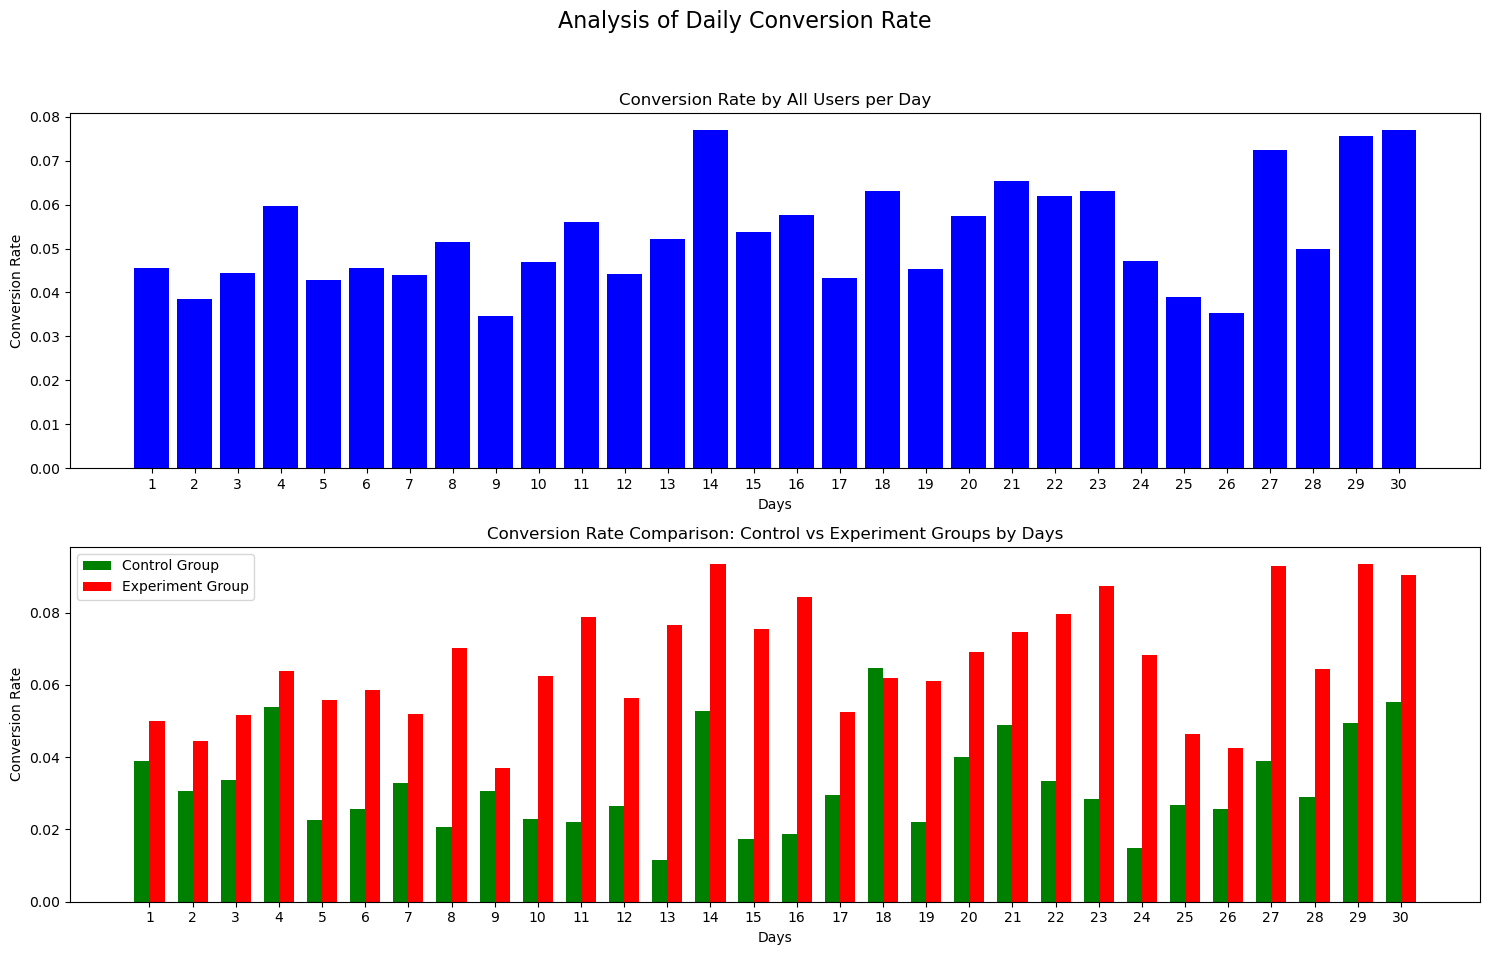

In [155]:
bar_fig(period=days, 
        data1=days_conversions, 
        data2=days_conversions_con, 
        data3=days_conversions_exp, 
        subtit1='Conversion Rate by All Users per Day', 
        subtit2='Conversion Rate Comparison: Control vs Experiment Groups by Days', 
        x_label='Days', 
        y_label='Conversion Rate', 
        figtitle='Analysis of Daily Conversion Rate')

The conversion rates vary significantly throughout the month, with notable peaks on the 14th, 27th, 29th, and 30th. The second chart illustrates that the experiment (or treatment) group generally achieves higher conversion rates than the control group on most days. The exception to this trend occurs on the 18th, where the control group outperforms the experiment group.

In [156]:
top_days = days_conversions.sort_values(ascending=False).head(5)
print(top_days.index)

Index([30, 14, 29, 27, 21], dtype='int64', name='days_with_most_add')


### 8) Conversion Rate by Hours

In [157]:
hour_conversions = df.groupby('peak_ad_hours')['made_purchase'].mean()
hour_conversions.columns = ['conversion_rate']
hour_conversions.head(5)

peak_ad_hours
0    0.065789
1    0.051282
2    0.046448
3    0.040936
4    0.031662
Name: made_purchase, dtype: float64

In [158]:
hour_conversions_exp = df[df['group'] == 'ad'].groupby('peak_ad_hours')['made_purchase'].mean()
hour_conversions_exp.name = 'conversion_rate'
hour_conversions_con = df[df['group'] == 'psa'].groupby('peak_ad_hours')['made_purchase'].mean()
hour_conversions_con.name = 'conversion_rate'

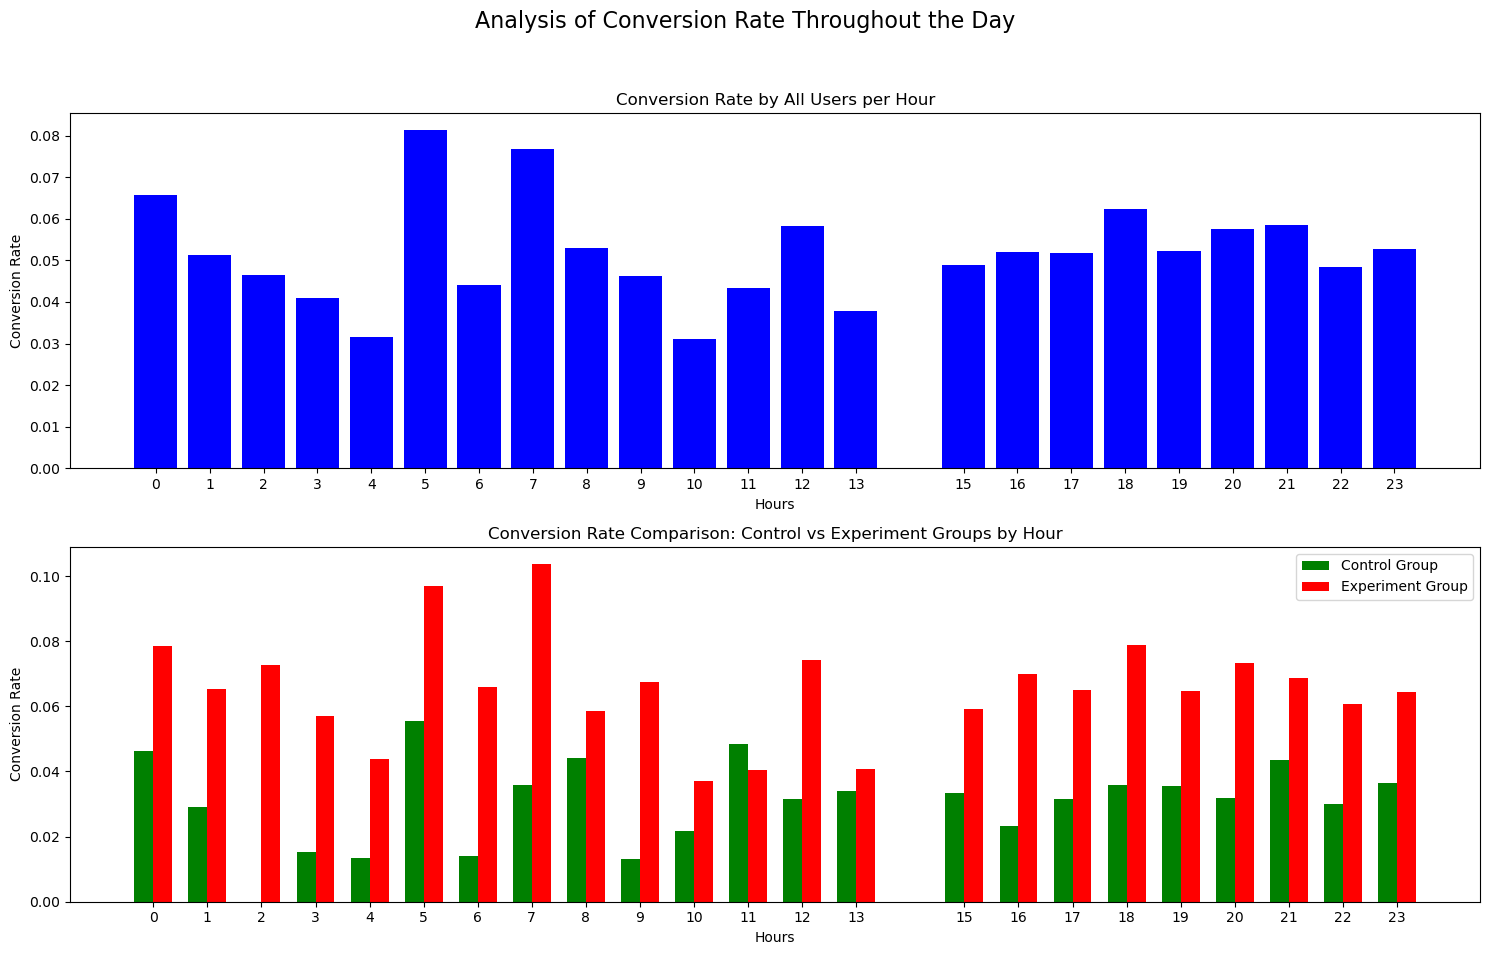

In [159]:
bar_fig(period=time, 
        data1=hour_conversions, 
        data2=hour_conversions_con, 
        data3=hour_conversions_exp, 
        subtit1='Conversion Rate by All Users per Hour', 
        subtit2='Conversion Rate Comparison: Control vs Experiment Groups by Hour', 
        x_label='Hours', 
        y_label='Conversion Rate', 
        figtitle='Analysis of Conversion Rate Throughout the Day')

In [160]:
peak_hours = hour_conversions.sort_values(ascending=False).head(5)
print(peak_hours.index)

Index([5, 7, 0, 18, 21], dtype='int64', name='peak_ad_hours')


There is significant variability in conversion rates throughout the day. Peaks occur at specific times, notably at 5 AM, 7 AM, midnight, and 6 PM. When comparing the two groups, the experiment group consistently demonstrates higher conversion rates across almost every hour, except at 11 AM where it underperforms relative to the control group. 

## A\B Testing

In [161]:
conversions.columns

Index(['number of observations', 'total_conversions', 'conversion_rate',
       'std_dev', 'std_error'],
      dtype='object')

In [162]:
n_con = conversions.loc['Control Group', 'number of observations']
n_exp = conversions.loc['Treatment Group', 'number of observations']
conv_con = conversions.loc['Control Group', 'total_conversions']
conv_exp = conversions.loc['Treatment Group', 'total_conversions']

In [163]:
n = [n_exp, n_con]
conversion = [conv_exp, conv_con]

#### Notes:

* $\beta$ (Prob of Type 2 Error) = 0.20 or **Power**: 0.80
* $\alpha$ (Level of Significance) = 0.05

In [164]:
alpha = 0.05

# Z-score for two-tailed test
z_critical = stats.norm.ppf(1 - alpha / 2)
print(f"Z-critical values for alpha, {alpha}: (-{z_critical:.2f}, {z_critical:.2f}).")

Z-critical values for alpha, 0.05: (-1.96, 1.96).


### 1) Two-tailed Test
**Null Hypothesis ($H_0$)**: The ads have no effect on sales.

**Alternative Hypothesis ($H_1$)**: The ads have a significant effect on sales. That is, there is a statistically significant difference in sales between the treatment group (ad) and the control group (psa).

$$ H_0: \mu_{\text{ad}} = \mu_{\text{psa}} $$
$$ H_1: \mu_{\text{ad}} \neq \mu_{\text{psa}} $$

In [165]:
z_test_two, pval_two = proportions_ztest(conversion, nobs=n)

print(f'The Z-score of the two-tailed test is {z_test_two:.3f}. Since it is significantly higher than {z_critical:.2f}, we can reject the null hypothesis and conclude that the ads have a significant effect on sales.')

print(f'OR The p-value of two-tailed test is {pval_two:.5f}, which is lower than 0.05. That is, there is a statistically significant difference in sales between the treatment group (ad) and the control group (psa).')

print('In other words, both the Z-score and the p-value are consistent with each other and indicate a significant effect of the ads on sales.')

The Z-score of the two-tailed test is 10.590. Since it is significantly higher than 1.96, we can reject the null hypothesis and conclude that the ads have a significant effect on sales.
OR The p-value of two-tailed test is 0.00000, which is lower than 0.05. That is, there is a statistically significant difference in sales between the treatment group (ad) and the control group (psa).
In other words, both the Z-score and the p-value are consistent with each other and indicate a significant effect of the ads on sales.


**Confidence interval**:

In [166]:
convrate_exp = conversions.loc['Treatment Group', 'conversion_rate']
convrate_con = conversions.loc['Control Group', 'conversion_rate']
convrate_diff = convrate_exp - convrate_con
se_diff = np.sqrt((conversions.loc['Treatment Group', 'std_error'])**2 + (conversions.loc['Control Group', 'std_error'])**2)
margin_error = z_critical * se_diff
print(f"Difference in conversion rates: {convrate_diff:.5f}")
print(f"Standard error of the difference: {se_diff:.5f}")
print(f'Margin of error: {margin_error:.5f}')

Difference in conversion rates: 0.03428
Standard error of the difference: 0.00302
Margin of error: 0.00591


In [167]:
ci_lower = convrate_diff - margin_error
ci_upper = convrate_diff + margin_error
print(f"The 95% confidence interval for the difference in conversion rates is ({ci_lower:.5f}, {ci_upper:.5f}).")

The 95% confidence interval for the difference in conversion rates is (0.02837, 0.04019).


### 2) One-tailed Test
**Null Hypothesis ($H_0$)**: The ads have no effect on sales.

**Alternative Hypothesis ($H_1$)**: The treatment group has higher sales compared to the control group. In other words, ads increase sales.

$$ H_0: \mu_{\text{ad}} = \mu_{\text{psa}} $$
$$ H_1: \mu_{\text{ad}} > \mu_{\text{psa}} $$

In [168]:
z_critical_onetailed = stats.norm.ppf(1 - alpha)

print(f"Z-Critical value for one-tailed test with alpha {alpha}: {z_critical_onetailed:.3f}")

Z-Critical value for one-tailed test with alpha 0.05: 1.645


In [169]:
conversion_onetailed = [conv_exp, conv_con]
n_onetailed = [n_exp, n_con]
z_test_one, pval_one = proportions_ztest(conversion_onetailed, nobs=n_onetailed, alternative='larger')
z_test_one, pval_one

(10.590153051109288, 1.6552506718082564e-26)

In [170]:
print(f'The Z-score of the two-tailed test is {z_test_one:.3f}. Since it is higher than {z_critical_onetailed:.3f}, we can reject the null hypothesis and conclude that the ads increase sales.')

print(f'OR The p-value of two-tailed test is {pval_one:.5f}, which is lower than 0.05.')

print('In other words, both Z-score and p-value show that the ads lead to an increase in sales.')

The Z-score of the two-tailed test is 10.590. Since it is higher than 1.645, we can reject the null hypothesis and conclude that the ads increase sales.
OR The p-value of two-tailed test is 0.00000, which is lower than 0.05.
In other words, both Z-score and p-value show that the ads lead to an increase in sales.


**Confidence Interval:**

In [171]:
margin_error_onetailed = z_critical_onetailed * se_diff
print(f'Margin of error: {margin_error_onetailed:.5f}')

Margin of error: 0.00496


In [172]:
ci_lower = convrate_diff - margin_error_onetailed
ci_upper = convrate_diff + margin_error_onetailed
print(f"The 95% confidence interval for the difference in conversion rates is ({ci_lower:.5f}, {ci_upper:.5f}).")

The 95% confidence interval for the difference in conversion rates is (0.02932, 0.03924).


## Conclusion

Main result of this study is that **ads increase sales**. Additional findings include::

* The treatment group exhibits higher customer activity and a greater total number of ads viewed compared to the control group.
* Between 15:00 and 23:00, customer activity and the number of ads seen are significantly higher than during other hours.
* Despite the increased activity during these hours, the peak times for making purchases across all users are at midnight (0:00), 5 AM, and 7 AM. This indicates that higher customer activity does not necessarily lead to higher conversions.